In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import warnings
import math
warnings.filterwarnings ('ignore')

In [ ]:
# Load data
df = pd.read_csv ('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
df.head (10)

,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [ ]:
df.columns = ['exam_1', 'exam_2', 'status']
m, n = df.shape
print ('Number of training examples: m =', m)
print ('Number of features: n =', n - 1)

Number of training examples: m = 100
Number of features: n = 2


In [ ]:
df_admitted = df[df['status'] == 1]
print ('Dimenstion of admitted data', df_admitted.shape)

Dimenstion of admitted data (60, 3)


In [ ]:
df_notadmitted = df[df['status'] == 0]
print ('Dimenstion of not admitted data', df_notadmitted.shape)

Dimenstion of not admitted data (40, 3)


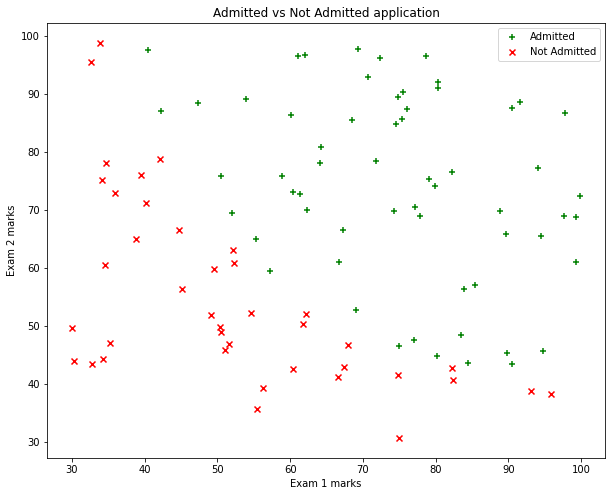

In [ ]:
plt.figure (figsize= (10, 8))
plt.scatter (df_admitted['exam_1'], df_admitted['exam_2'], c= 'g', marker = '+', label = 'Admitted')
plt.scatter (df_notadmitted['exam_1'], df_notadmitted['exam_2'], c= 'r', marker = 'x', label = 'Not Admitted')
plt.xlabel ('Exam 1 marks')
plt.ylabel ('Exam 2 marks')
plt.legend ()
plt.title ('Admitted vs Not Admitted application')
warnings.filterwarnings ('ignore')

In [ ]:

X = df.iloc [:, 0:2]
# Add bias '1' into X
X = np.hstack((np.ones((m, 1)), X))
print ('Dimension of features matrix X =', X.shape, '\n')

y = df.iloc[:, -1]
for i in range (5):
  print ('x =', X[i, ], ',y =', y[i])

Dimension of features matrix X = (100, 3) 

x = [ 1.         34.62365962 78.02469282] ,y = 0
x = [ 1.         30.28671077 43.89499752] ,y = 0
x = [ 1.         35.84740877 72.90219803] ,y = 0
x = [ 1.         60.18259939 86.3085521 ] ,y = 1
x = [ 1.         79.03273605 75.34437644] ,y = 1


# Linear hypothesis


In [ ]:
theta = np.zeros (n)
theta

array([0., 0., 0.])

In [ ]:
# Create functions
def sigmoid (z):
    g = 1 / (1 + np.exp(-z))
    return g


def cost_function (theta, X , y):
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

    return J


def gradient (theta, X, y):
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return grad

In [ ]:
cost = cost_function (theta, X, y)
print ('Cost at initial theta(zeros):', cost)
grad = gradient (theta, X, y)
print ("Gradient at inital theta(zeros):", grad)

Cost at initial theta(zeros): 0.6931471805599453
Gradient at inital theta(zeros): [ -0.1        -12.00921659 -11.26284221]


In [ ]:
# Using Advance Opimisation Technique to find theta

'''
fmin_tnc function takes 4 arguments:
- func: Cost function to minimise
- fprime: Gradient for the function defined by 'func'
- x0: inital theta
- arg: features & label values
'''

theta, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient, x0 = theta, args = (X, y))

cost = cost_function (theta, X, y)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.20349770158947436
theta: [-25.16131865   0.20623159   0.20147149]


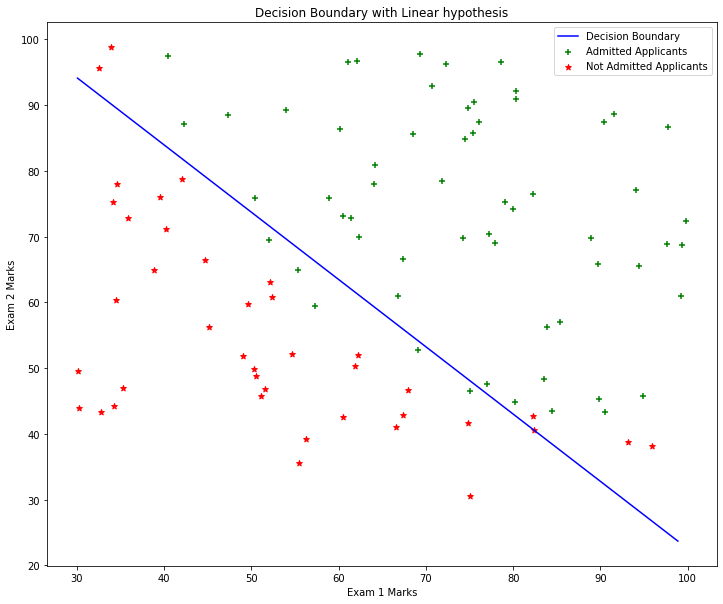

In [ ]:
x_values = [min(X[:,1]), np.max(X[:, 2])]
y_values = -(theta[0] + np.dot(theta[1], x_values))/ theta[2]

plt.figure(figsize = (12,10))
plt.scatter (df_admitted['exam_1'], df_admitted['exam_2'], color='green', marker = '+', label='Admitted Applicants')
plt.scatter (df_notadmitted['exam_1'], df_notadmitted['exam_2'], color='red', marker = '*', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')

plt.plot(x_values, y_values, color='blue', label='Decision Boundary')
plt.legend()
plt.title('Decision Boundary with Linear hypothesis')
warnings.filterwarnings ('ignore')

*Model testing*

In [ ]:
# Model testing
'''
Question: Predict an admisstion probability for applicant with Exam 1: 45 and Exam 2: 85
'''
input_data = np.array ([1, 45, 85])
prob = sigmoid (np.dot(input_data, theta))
print ('Admission for applicant with score for Exam 1: 45 and Exam 2: 85 is', prob)

Admission for applicant with score for Exam 1: 45 and Exam 2: 85 is 0.7762906229081791


In [ ]:
def predict (theta, X):
    p = sigmoid (X.dot(theta)) >= 0.5
    return p.astype (int)

In [ ]:
p = predict (theta, X)
print ('Accuracy:', np.mean (p == y)* 100, '%')

Accuracy: 89.0 %


# Non-linear hypothesis 

In [ ]:
df.head ()

,exam_1,exam_2,status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


*Adding features into existing data*

In [ ]:
df_mapping = df

In [ ]:
df_mapping ['exam_1'] = round (df_mapping['exam_1'], 2)
df_mapping ['exam_2'] = round (df_mapping['exam_2'], 2)
df_mapping ['exam_1**2'] = round (df_mapping['exam_1']**2, 2)
df_mapping ['exam_2**2'] = round (df_mapping['exam_2']**2, 2)
df_mapping ['exam_1**exam_2'] = round (df_mapping['exam_1']*df_mapping['exam_2'], 2)
df_mapping = df_mapping [['exam_1', 'exam_2', 'exam_1**2', 'exam_2**2', 'exam_1**exam_2', 'status']]

df_mapping.head ()

,exam_1,exam_2,exam_1**2,exam_2**2,exam_1**exam_2,status
0,34.62,78.02,1198.54,6087.12,2701.05,0
1,30.29,43.89,917.48,1926.33,1329.43,0
2,35.85,72.90,1285.22,5314.41,2613.46,0
3,60.18,86.31,3621.63,7449.42,5194.14,1
4,79.03,75.34,6245.74,5676.12,5954.12,1


In [ ]:
m, n = df.shape
print ('Number of training examples: m =', m)
print ('Number of features: n =', n - 1)

Number of training examples: m = 100
Number of features: n = 5


*Convert data into numpy array*

In [ ]:
# Compute cost function
X = df_mapping.iloc [:, 0:5]
# Add bias '1' into X
X = np.hstack((np.ones((m, 1)), X))
print ('Dimension of features matrix X =', X.shape, '\n')

y = df_mapping.iloc[:, -1]
for i in range (5):
  print ('x =', X[i, ], ',y =', y[i])

Dimension of features matrix X = (100, 6) 

x = [1.00000e+00 3.46200e+01 7.80200e+01 1.19854e+03 6.08712e+03 2.70105e+03] ,y = 0
x = [1.00000e+00 3.02900e+01 4.38900e+01 9.17480e+02 1.92633e+03 1.32943e+03] ,y = 0
x = [1.00000e+00 3.58500e+01 7.29000e+01 1.28522e+03 5.31441e+03 2.61346e+03] ,y = 0
x = [1.00000e+00 6.01800e+01 8.63100e+01 3.62163e+03 7.44942e+03 5.19414e+03] ,y = 1
x = [1.00000e+00 7.90300e+01 7.53400e+01 6.24574e+03 5.67612e+03 5.95412e+03] ,y = 1


In [ ]:
theta = np.zeros (n)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
cost = cost_function (theta, X, y)
print ('Cost at initial theta(zeros):', cost)
grad = gradient (theta, X, y)
print ("Gradient at inital theta(zeros):", grad)

Cost at initial theta(zeros): 0.6931471805599453
Gradient at inital theta(zeros): [-1.00000000e-01 -1.20091500e+01 -1.12627500e+01 -1.13894710e+03
 -1.06938815e+03 -1.09871105e+03]


In [ ]:
theta, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient, x0 = theta, args = (X, y))

cost = cost_function (theta, X, y)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.09308671995225984
theta: [-1.86658031e-02 -3.75098825e-01 -3.09458464e-01  1.07058575e-03
  3.51029612e-04  1.03063990e-02]


*Visualising data with features mapping*

In [ ]:
def quadratic (a, b, c):
    # Just return x > 0
    delta = b**2 - 4*a*c
    if (delta >= 0):
        x1 = ((-b + math.sqrt(delta)) / (2*a))
        x2 = ((-b - math.sqrt(delta)) / (2*a))
    if (x1 > 0):
        return (x1)
    elif (x2 > 0):
        return (x2)


In [ ]:
x_values = np.concatenate ((np.linspace (39, 98, 60),[max(X[:,1])]))
x_values


array([39.  , 40.  , 41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 56.  ,
       57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  , 65.  ,
       66.  , 67.  , 68.  , 69.  , 70.  , 71.  , 72.  , 73.  , 74.  ,
       75.  , 76.  , 77.  , 78.  , 79.  , 80.  , 81.  , 82.  , 83.  ,
       84.  , 85.  , 86.  , 87.  , 88.  , 89.  , 90.  , 91.  , 92.  ,
       93.  , 94.  , 95.  , 96.  , 97.  , 98.  , 99.83])

In [ ]:
y_values = []
for x_value in x_values:
    a = theta[4]
    b = np.dot (theta[5], x_value) + theta[2]
    c = theta[0] + np.dot(theta[1], x_value) + np.dot(theta[3], x_value**2)
    y_value = quadratic (a, b, c)
    y_values.append (y_value)
y_values = np.asarray (y_values)
y_values

array([101.59108449,  97.20756255,  93.24285964,  89.64625676,
        86.37354492,  83.38630991,  80.65122557,  78.13939151,
        75.82573319,  73.68847022,  71.70865238,  69.86975859,
        68.15735279,  66.55878995,  65.06296545,  63.6601018 ,
        62.34156714,  61.09972074,  59.92778133,  58.81971476,
        57.77013794,  56.77423657,  55.82769455,  54.92663317,
        54.06755882,  53.24731761,  52.46305621,  51.71218775,
        50.99236218,  50.30144034,  49.63747136,  48.99867278,
        48.38341313,  47.79019656,  47.21764924,  46.66450744,
        46.12960684,  45.6118731 ,  45.11031346,  44.62400927,
        44.15210927,  43.69382358,  43.24841839,  42.81521109,
        42.39356593,  41.98289013,  41.58263034,  41.19226944,
        40.81132368,  40.43934   ,  40.07589373,  39.72058636,
        39.37304359,  39.03291358,  38.69986521,  38.37358669,
        38.05378409,  37.74018018,  37.43251318,  37.13053577,
        36.59188551])

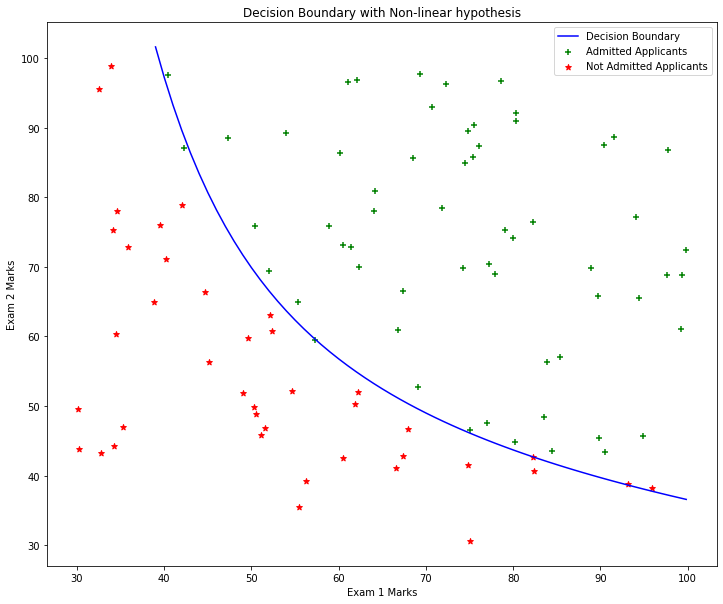

In [ ]:
plt.figure(figsize = (12,10))
plt.scatter (df_admitted['exam_1'], df_admitted['exam_2'], color='green', marker = '+', label='Admitted Applicants')
plt.scatter (df_notadmitted['exam_1'], df_notadmitted['exam_2'], color='red', marker = '*', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')


plt.plot (x_values, y_values, color='blue', label='Decision Boundary')
plt.legend()
plt.title ('Decision Boundary with Non-linear hypothesis')
warnings.filterwarnings ('ignore')

*Model testing*

In [ ]:
p = predict (theta, X)
print ('Accuracy:', np.mean (p == y)* 100, '%')

Accuracy: 95.0 %


In [ ]:
'''
Question: Predict an admisstion probability for applicant with Exam 1: 45 and Exam 2: 85
'''
input_data = np.array ([1, 45, 85, 45**2, 85**2, 45*85])
prob = sigmoid (np.dot(input_data, theta))
print ('Admission for applicant with score for Exam 1: 45 and Exam 2: 85 is', round(prob*100, 2), '%')

Admission for applicant with score for Exam 1: 45 and Exam 2: 85 is 71.59 %
